# Natural Language Processing and Text Analytics Final Exam [KAN-CDSCO1002U]

Afnan El-Segaier (137863)  
Une Aspelin (152294)  
Kristin Sundby (167303)  
Marlin Haavengen (167342)
  


---


  
This section outlines the code for the **Logistic Regression** model:
*   Preprocessing
*   Emoji Replacement
*   Building the model using the training dataset
*   Testing the model using the test dataset





## Logistic Regression Model

###**Step 1: Preprocessing With Emoji Replacement:**

In [ ]:
pip install emoji

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 431.4/431.4 kB 6.5 MB/s eta 0:00:00


In [ ]:
# Import necessary libraries

import re
import nltk
import emoji
import pandas as pd
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Download necessary NLTK data
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

**Defining The Replace_emoji And Preprocess Functions:**

In [ ]:
# Function to replace emojis with descriptive text
def replace_emojis(text):
    return emoji.demojize(text, delimiters=(" ", " ")) if isinstance(text, str) else ""

# Function to preprocess text
def preprocess_text(text):
    if not isinstance(text, str):
        return None

    # Remove '@' mentions
    text = re.sub(r'@\S+', '', text)

    # Remove URLs
    text = re.sub(r'http\S+', '', text)

    # Remove specified hashtags
    text = re.sub(r'#sarcasm|#sarcastic|#irony|#ironic', '', text, flags=re.IGNORECASE)

    # Replace emojis with descriptive text
    text = emoji.demojize(text, delimiters=(" ", " "))

    # Convert to lowercase
    text = text.lower()

    # Remove digits
    text = re.sub(r'\d+', '', text)

    # Remove punctuation and special characters but keep underscores
    text = re.sub(r'[^\w\s]', '', text)

    # Tokenize the text
    tokens = word_tokenize(text)

    # Remove stopwords and short tokens
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words and len(word) > 2]

    # Lemmatize words
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]

    # Join tokens back into a single string
    processed_text = ' '.join(tokens)

    return processed_text if processed_text.strip() else None

**Applying The Functions To Both Test (isarcasm_train.csv) And Training  (isarcasm_test.csv) Datasets:**

In [ ]:
# Load the training and test datasets
df_train = pd.read_csv('isarcasm_train.csv')
df_test = pd.read_csv('isarcasm_test.csv')

# Rename columns for consistency
df_train = df_train.rename(columns={'tweet': 'text', 'sarcastic': 'label'})
df_test = df_test.rename(columns={'sarcastic': 'label'})

# Handle NaN values and ensure all entries are strings in both datasets
df_train['text'] = df_train['text'].fillna('').astype(str)
df_test['text'] = df_test['text'].fillna('').astype(str)

# Apply the preprocessing function to both datasets
df_train['Tweets_Cleaned'] = df_train['text'].apply(preprocess_text)
df_test['Tweets_Cleaned'] = df_test['text'].apply(preprocess_text)

# Apply the emoji replacement function to both datasets
df_train['Tweets_Cleaned'] = df_train['Tweets_Cleaned'].apply(replace_emojis)
df_test['Tweets_Cleaned'] = df_test['Tweets_Cleaned'].apply(replace_emojis)

# Remove rows with empty 'Tweets_Cleaned' column in both datasets
df_train = df_train.dropna(subset=['Tweets_Cleaned'])
df_test = df_test.dropna(subset=['Tweets_Cleaned'])

###**Step 2: Build And Test The Logistic Regression Model:**

Classification report and confusion matrix to evaluate the model is provided

Test Set:
              precision    recall  f1-score   support

           0       0.88      0.93      0.90      1200
           1       0.34      0.23      0.27       200

    accuracy                           0.83      1400
   macro avg       0.61      0.58      0.59      1400
weighted avg       0.80      0.83      0.81      1400



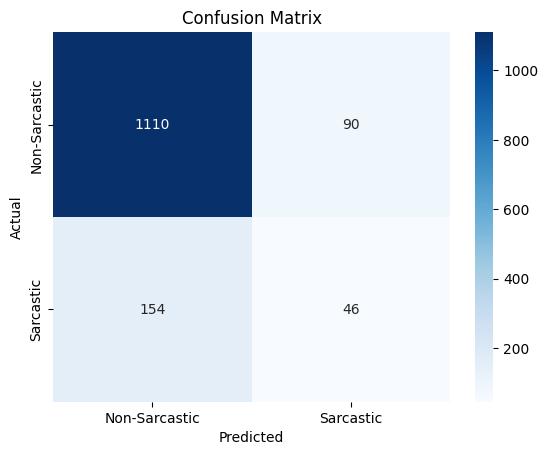

In [ ]:
# Vectorization using CountVectorizer (Bag of Words model)
vectorizer = CountVectorizer()
X_train = vectorizer.fit_transform(df_train['Tweets_Cleaned'])
y_train = df_train['label']
X_test = vectorizer.transform(df_test['Tweets_Cleaned'])
y_test = df_test['label']

# Train Logistic Regression model
model = LogisticRegression(random_state=42, max_iter=1000)
model.fit(X_train, y_train)

# Make predictions for test set
y_test_pred = model.predict(X_test)

# Print classification report
print('Test Set:')
print(classification_report(y_test, y_test_pred))

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_test_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Sarcastic', 'Sarcastic'], yticklabels=['Non-Sarcastic', 'Sarcastic'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

**Print A Selection Of Correct And Incorrect Predictions:**

In [ ]:
# Sentences to predict
sentences = [
    "Biden is a great President like none other we have had",
    "Max Verstappen is such a clean driver, he never makes dirty moves when racing.",
    "I just can’t wait to spend time with my family over Christmas! I just love being the only single one and the many many questions asking when will I get a boyfriend 🙄",
    "Well this is awesome news to wake up to!",
    "So school have sent out a really helpful newsletter with all key dates and activities. So many fun things arranged for the children.",
    "I just love the smell of one million 😍"
]

# Preprocess the sentences
preprocessed_sentences = [preprocess_text(sentence) for sentence in sentences]

# Vectorize the preprocessed sentences
X_sentences = vectorizer.transform(preprocessed_sentences)

# Predict the labels
predictions = model.predict(X_sentences)

# Display the predictions
for sentence, prediction in zip(sentences, predictions):
    print(f"Sentence: {sentence}\nPrediction: {'Sarcastic' if prediction == 1 else 'Non-Sarcastic'}\n")

Sentence: Biden is a great President like none other we have had
Prediction: Non-Sarcastic

Sentence: Max Verstappen is such a clean driver, he never makes dirty moves when racing.
Prediction: Non-Sarcastic

Sentence: I just can’t wait to spend time with my family over Christmas! I just love being the only single one and the many many questions asking when will I get a boyfriend 🙄
Prediction: Sarcastic

Sentence: Well this is awesome news to wake up to!
Prediction: Non-Sarcastic

Sentence: So school have sent out a really helpful newsletter with all key dates and activities. So many fun things arranged for the children.
Prediction: Non-Sarcastic

Sentence: I just love the smell of one million 😍
Prediction: Non-Sarcastic

